In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [13]:
## importing data
data = pd.read_csv('dumper.csv')
data = pd.DataFrame(data = data)
#data = pd.DataFrame(data = data, columns=['age', 'experience_in_mines', 'education', 'health_problem', 'medicine', 'smoke', 'drinking', 'martial_status', 'children', 'work_design', 'job_demand', 'repititive_work', 'akward_posture', 'shoulder_pain'])
data = pd.DataFrame(data = data, columns=['age', 'experience_in_mines', 'medicine', 'smoke', 'drinking', 'martial_status', 'work_design', 'job_demand', 'akward_posture', 'shoulder_pain'])

#data = data.rename(columns={data.columns[0]: 'sex'})
## data discribing
a= data.describe()
a.to_excel("output.xlsx")
#a
data.info()
## data preparation
data.dropna(inplace= True)
#data = float(data)
#data.info()
data_new = data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  123 non-null    float64
 1   experience_in_mines  123 non-null    float64
 2   medicine             123 non-null    float64
 3   smoke                123 non-null    float64
 4   drinking             123 non-null    float64
 5   martial_status       123 non-null    float64
 6   work_design          123 non-null    float64
 7   job_demand           123 non-null    float64
 8   akward_posture       123 non-null    float64
 9   shoulder_pain        124 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 9.8 KB


In [14]:
data.iloc[:,0:-1]

,age,experience_in_mines,medicine,smoke,drinking,martial_status,work_design,job_demand,akward_posture
0,37.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1,35.0,7.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2,34.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,40.0,15.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,27.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
118,29.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,29.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
120,28.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
121,28.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


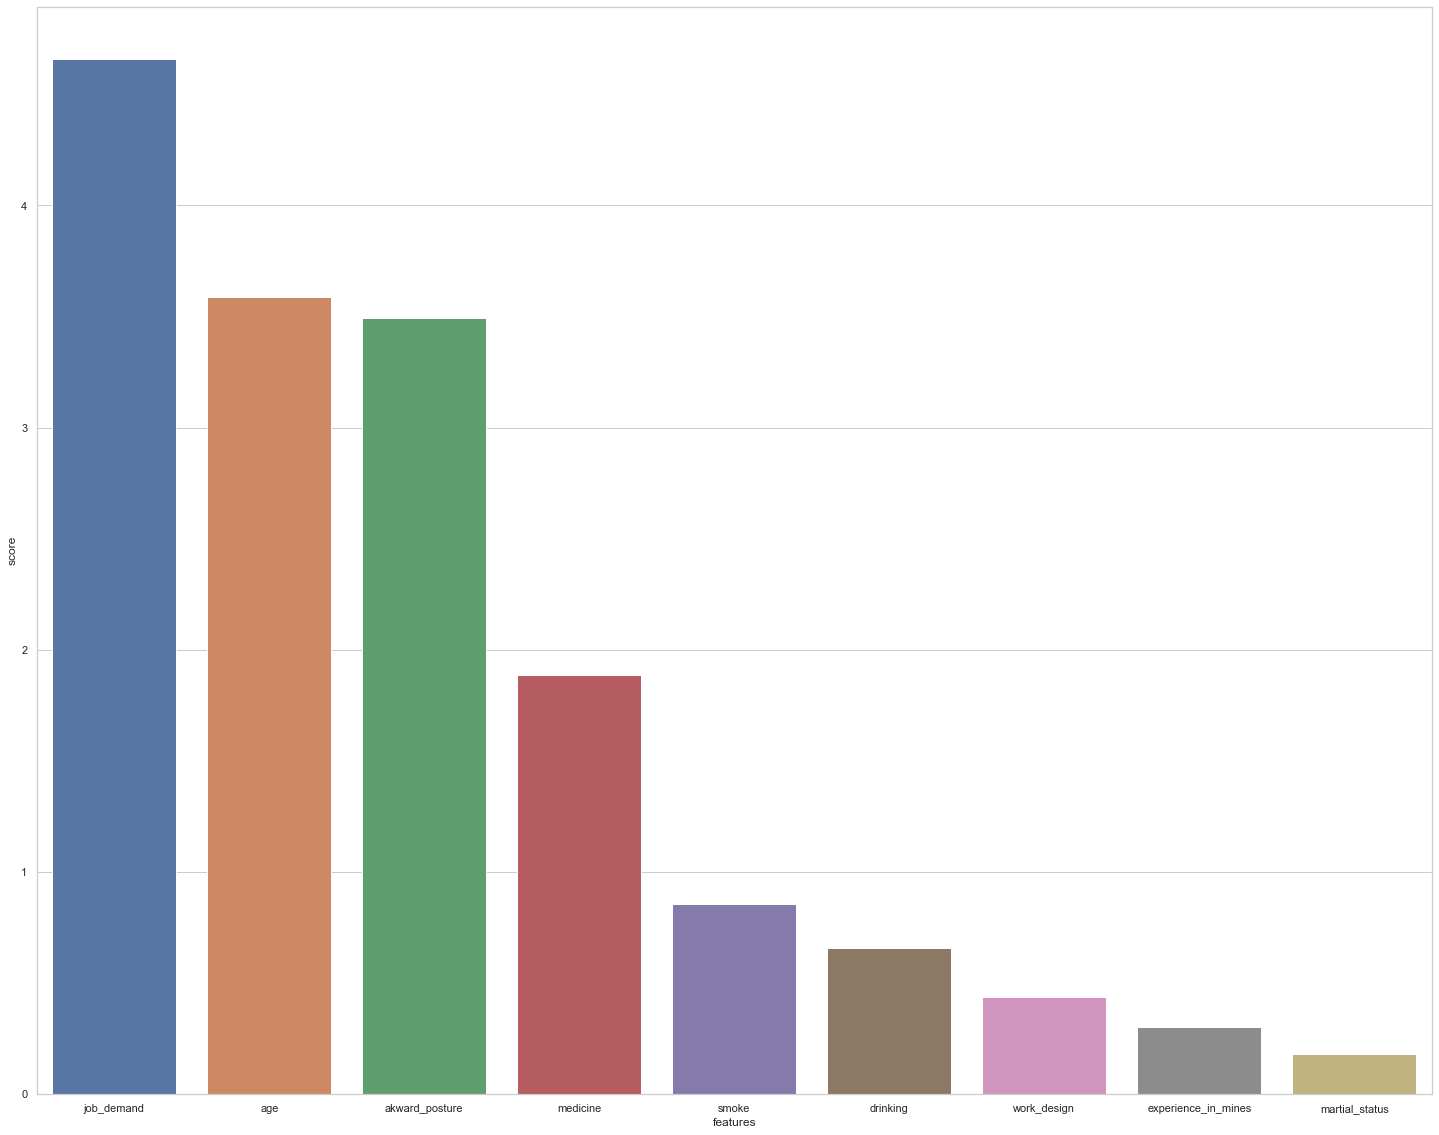

In [17]:
bestfeatures = SelectKBest(score_func= chi2, k = 9)
fit = bestfeatures.fit(X = data.iloc[:,0:-1], y = data.iloc[:,-1])
a = fit.scores_
a = pd.DataFrame(data = a)
b = data.iloc[:,0:-1].columns
b = pd.DataFrame(data = b)
c = pd.concat([a,b], axis=1)
c.columns = ['score', 'features']
c = c.sort_values('score', ascending=False)
plt.figure(figsize= (25,20))
sns.barplot(x = c['features'], y = c['score'])
data_new = data

KeyError: 'education'

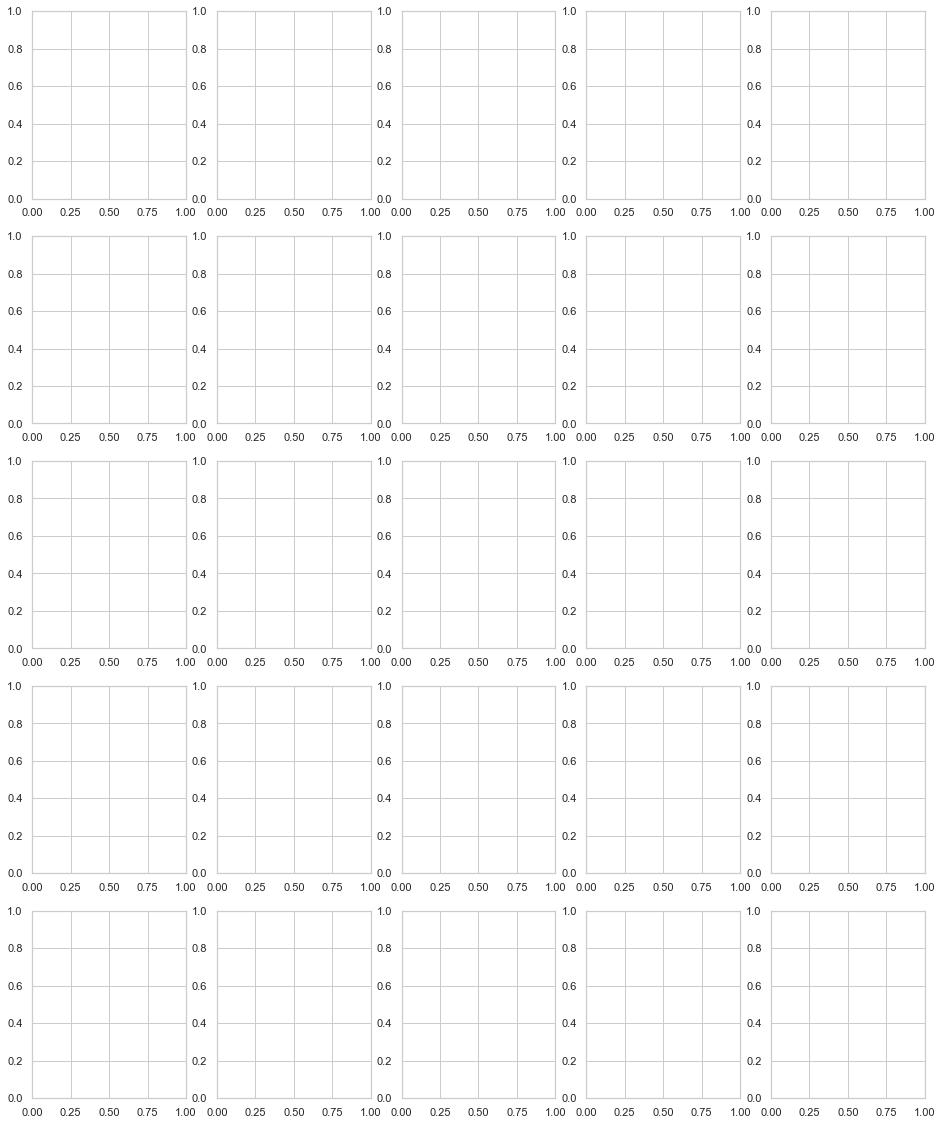

In [16]:
## Explolatory Data Analysis
sns.set(style="whitegrid")  
fig,axs = plt.subplots(5,5, figsize = (16,20))
sns.countplot(x = data_new['education'], ax=axs[0,0])
sns.histplot(x = data_new['vehical_age'], ax = axs[0,1])
sns.histplot(x = data_new['broken_in_1year'], ax=axs[0,2])
sns.countplot(x = data_new['health_problem'], ax=axs[0,3])
sns.countplot(x = data_new['medicine'], ax=axs[0,4])
sns.countplot(x = data_new['smoke'], ax=axs[1,0])
sns.histplot(x = data_new['experience_in_mines'], ax=axs[1,1])
sns.histplot(x = data_new['leisure_time'], ax=axs[1,2])
sns.histplot(x = data_new['sleep_hours'], ax=axs[1,3])
sns.histplot(x = data_new['working_hours'], ax = axs[1,4])
sns.countplot(x = data_new['drinking'], ax=axs[2,0])
sns.countplot(x = data_new['worked_with_injury'], ax=axs[2,1])
sns.countplot(x = data_new['martial_status'], ax=axs[2,2])
sns.countplot(x = data_new['family_size'], ax=axs[2,3])
sns.countplot(x = data_new['involvement_in_hobbies'], ax=axs[2,4])
sns.countplot(x = data_new['work_design'], ax=axs[3,0])
sns.countplot(x = data_new['job_demand'], ax=axs[3,1])
sns.countplot(x = data_new['repititive_work'], ax=axs[3,2])
sns.countplot(x = data_new['akward_posture'], ax=axs[3,3])
sns.countplot(x = data_new['sleep_hours'], ax=axs[3,4])
sns.countplot(x = data_new['break_time_sufficient'], ax=axs[4,0])
sns.countplot(x = data_new['awarness_program_in_driving'], ax=axs[4,1])
sns.countplot(x = data_new['shoulder_pain'], ax=axs[4,2])

In [4]:
data_new_1= data_new.loc[data_new['shoulder_pain'] == 1]
data_new_1.info()
data_new_1 = data_new_1.sample(n = 55,random_state=4)
data_new_0= data_new.loc[data_new['shoulder_pain'] == 0]
data_new_0.info()
data_new_0 = data_new_0.sample(n = 55,random_state=4)
data_new_2 =pd.concat([data_new_0,data_new_1])
data_new = data_new_2.sample(n = 110, random_state=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 100
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  55 non-null     float64
 1   experience_in_mines  55 non-null     float64
 2   medicine             55 non-null     float64
 3   smoke                55 non-null     float64
 4   drinking             55 non-null     float64
 5   martial_status       55 non-null     float64
 6   work_design          55 non-null     float64
 7   job_demand           55 non-null     float64
 8   akward_posture       55 non-null     float64
 9   shoulder_pain        55 non-null     int64  
dtypes: float64(9), int64(1)
memory usage: 4.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 1 to 122
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  68 non-null     

<function matplotlib.pyplot.show(close=None, block=None)>

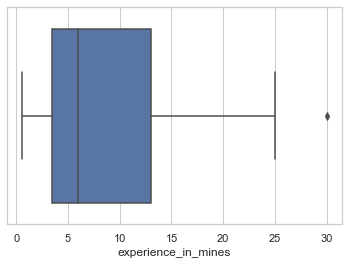

In [23]:
sns.set(style="whitegrid") 
sns.boxplot(x = data_new['experience_in_mines'])
plt.show

In [5]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 41 to 106
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  110 non-null    float64
 1   experience_in_mines  110 non-null    float64
 2   medicine             110 non-null    float64
 3   smoke                110 non-null    float64
 4   drinking             110 non-null    float64
 5   martial_status       110 non-null    float64
 6   work_design          110 non-null    float64
 7   job_demand           110 non-null    float64
 8   akward_posture       110 non-null    float64
 9   shoulder_pain        110 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 9.5 KB


In [5]:
Scaler = MinMaxScaler()
scaled_data = pd.DataFrame(data = Scaler.fit_transform(X = data_new))
x_train, x_test, y_train, y_test = train_test_split(scaled_data.iloc[:,0:-1],scaled_data.iloc[:,-1] ,test_size=0.1, random_state=True)

In [6]:

y_train

90     0.0
2      1.0
104    1.0
103    0.0
53     0.0
      ... 
9      1.0
72     0.0
12     0.0
107    1.0
37     0.0
Name: 9, Length: 99, dtype: float64

In [7]:
LR = LogisticRegression()
LR.fit(X = x_train, y = y_train)
x = cross_val_score(LR,x_train,y_train,cv=10,scoring='accuracy')
print(x.mean())
y_pred = LR.predict(x_train)
print(precision_score(y_train, y_pred))
print(recall_score(y_train, y_pred))
print(f1_score(y_train, y_pred))



0.5455555555555555
0.6956521739130435
0.6666666666666666
0.6808510638297872


In [8]:
DT = DecisionTreeClassifier(max_depth=4, criterion='gini')
DT.fit(X = x_train, y = y_train)
y_predict = DT.predict(x_test)
DT.score(x_test, y_test)
x = cross_val_score(DT,x_train,y_train,cv=10,scoring='accuracy')
print(x.mean())
DT.decision_path
DT.tree_
y_pred = DT.predict(x_train)
print(precision_score(y_train, y_pred))
print(recall_score(y_train, y_pred))
print(f1_score(y_train, y_pred))

0.5344444444444445
0.7254901960784313
0.7708333333333334
0.7474747474747475


[Text(0.6527777777777778, 0.9, 'X[0] <= 0.42\ngini = 0.5\nsamples = 99\nvalue = [51, 48]'),
 Text(0.4166666666666667, 0.7, 'X[1] <= 0.201\ngini = 0.47\nsamples = 61\nvalue = [38, 23]'),
 Text(0.2222222222222222, 0.5, 'X[2] <= 0.5\ngini = 0.495\nsamples = 40\nvalue = [22, 18]'),
 Text(0.1111111111111111, 0.3, 'X[4] <= 0.5\ngini = 0.499\nsamples = 29\nvalue = [14, 15]'),
 Text(0.05555555555555555, 0.1, 'gini = 0.483\nsamples = 22\nvalue = [13, 9]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.3333333333333333, 0.3, 'X[0] <= 0.26\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.2777777777777778, 0.1, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.3888888888888889, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6111111111111112, 0.5, 'X[0] <= 0.34\ngini = 0.363\nsamples = 21\nvalue = [16, 5]'),
 Text(0.5555555555555556, 0.3, 'X[0] <= 0.3\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.5, 0.1, 'gini = 0.198\nsamples 

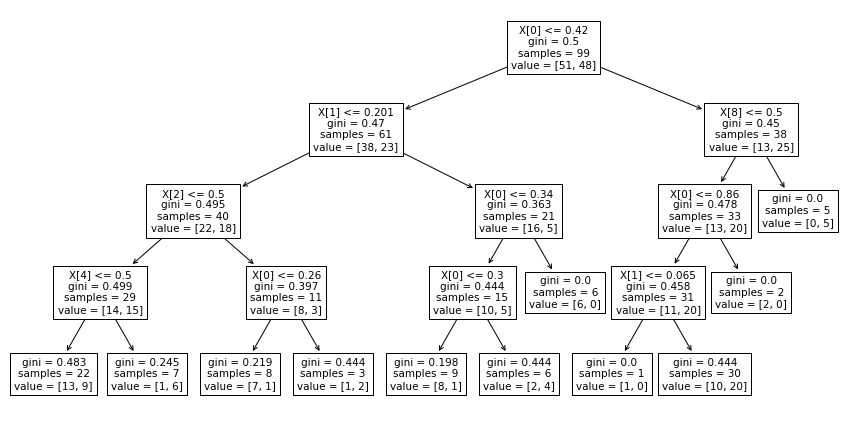

In [9]:
plt.figure(figsize= (15,7.5))
plot_tree(DT)

In [10]:
svm = SVC(kernel= 'linear')
svm.fit(x_train, y_train)
svm_predict = svm.predict(x_test)
svm.score(x_test, y_test)
x = cross_val_score(svm,x_train,y_train,cv=10,scoring='accuracy')
print(x.mean())
svm.coef_
y_pred = svm.predict(x_train)
print(precision_score(y_train, y_pred))
print(recall_score(y_train, y_pred))
print(f1_score(y_train, y_pred))

0.5455555555555555
0.7647058823529411
0.5416666666666666
0.6341463414634146


In [11]:
estimators = [('svm', svm), ('dt', DT),('lr',LR)]
VE = VotingClassifier(estimators= estimators)
VE.fit(x_train,y_train)
#VE.score(x_test, y_test)
x = cross_val_score(VE,x_train,y_train,cv=10,scoring='accuracy')
print(x.mean())
y_pred = VE.predict(x_train)
print(precision_score(y_train, y_pred))
print(recall_score(y_train, y_pred))
print(f1_score(y_train, y_pred))

0.5155555555555555
0.75
0.6875
0.717391304347826


In [24]:
BC = BaggingClassifier(n_estimators=15, max_samples=45)
BC.fit(x_train,y_train)
BC.score(x_test, y_test)
x = cross_val_score(BC, x_train,y_train,cv=10,scoring='accuracy')
print(x.mean())
y_pred = BC.predict(x_train)
print(precision_score(y_train, y_pred))
print(recall_score(y_train, y_pred))
print(f1_score(y_train, y_pred)) 

0.4533333333333333
0.8478260869565217
0.8125
0.8297872340425533


In [26]:
GB = GradientBoostingClassifier(n_estimators=5)
GB.fit(x_train,y_train)
GB.score(x_test, y_test)
x = cross_val_score(BC, x_train,y_train,cv=10,scoring='accuracy')
print(x.mean())
y_pred = GB.predict(x_train)
print(precision_score(y_train, y_pred))
print(recall_score(y_train, y_pred))
print(f1_score(y_train, y_pred))

0.5144444444444445
0.7777777777777778
0.7291666666666666
0.7526881720430108
